WRITING NAME IN DEVNAGRI SCRIPT

In [1]:
dev_name = "\u0938\u093F\u092E\u0930\u0928 \u092E\u0924\u092A\u093E\u0932"

print(dev_name)

सिमरन मतपाल


IMPORTING LIBRARIES

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

DATA COLLECTION

In [3]:
# Data Collection
data = pd.read_csv('temp.csv')

In [4]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


DATA WRANGLING

In [5]:
# Data Wrangling
print("\nNull Values:\n", data.isnull().sum())


Null Values:
 YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64


DROPPING THE TEMP MONTHS COLUMNS

In [6]:
temperature_data = data.loc[:, 'JAN':'DEC']
dropped_data=data.drop(columns=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
print(dropped_data.head())

   YEAR  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC
0  1901   28.96    23.27    31.46    31.27    27.25
1  1902   29.22    25.75    31.76    31.09    26.49
2  1903   28.47    24.24    30.71    30.92    26.26
3  1904   28.49    23.62    30.95    30.66    26.40
4  1905   28.30    22.25    30.00    31.33    26.57


PERFROMING THE STANDARDIZATION/NORMALIZATION AND PCA

In [7]:
scaler = StandardScaler()
temperature_data_scaled = scaler.fit_transform(temperature_data)
# Perform PCA on the extracted columns
pca = PCA(n_components=1)
pca_result = pca.fit_transform(temperature_data_scaled)

# Add the PCA component to the DataFrame
dropped_data['PCA1'] = pca_result

SELECTING THE INPUT FEATURES

In [8]:
# Calculate the correlation matrix between the remaining columns and 'PCA1'
correlation_matrix = dropped_data.drop(columns=['PCA1']).corrwith(dropped_data['PCA1']).abs()

# Sort the correlations in descending order
sorted_corr = correlation_matrix.sort_values(ascending=False)

# Get the highest and second-highest correlated features using indexing
input_feature_1 = sorted_corr.index[0]  # Highest correlated feature
input_feature_2 = sorted_corr.index[1]  # Second highest correlated feature

# Prepare the data for modeling with the highest correlated input feature
X_single = dropped_data[[input_feature_1]]
y = dropped_data['PCA1']
print(sorted_corr)
print("highest corr data: ",input_feature_1)

print("Second higgest corr data:- ",input_feature_2)

ANNUAL     0.988512
OCT-DEC    0.917755
JUN-SEP    0.859390
MAR-MAY    0.810007
JAN-FEB    0.802486
YEAR       0.796998
dtype: float64
highest corr data:  ANNUAL
Second higgest corr data:-  OCT-DEC


TRAINING AND TESTING

In [9]:
# Initialize variables for best metrics and model
best_model = None
min_mse_test = float('inf')
max_r2_test = float('-inf')  # R-squared should be maximized, so start with negative infinity
min_mae_test = float('inf')

min_mse_train = float('inf')
min_mae_train = float('inf')
max_r2_train = float('-inf')

best_X_train = None
best_X_test = None
best_y_train = None
best_y_test = None
best_train_size = None
best_test_size = None

# Initialize variables for best SSE
best_train_sse = float('inf')
best_test_sse = float('inf')

# Lists to store MSE, R2, and MAE values for plotting
mse_train_values = []
mse_test_values = []
r2_train_values = []
r2_test_values = []
mae_train_values = []
mae_test_values = []
train_sse = []
test_sse = []

# Start with train_size=0.1 and increment it by 0.1 until 0.9
train_size = 0.1
model = LinearRegression()

while train_size <= 0.9:
    print(f"Training size: {train_size}")
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_single, y, train_size=train_size, random_state=10)
    
    # Train the Linear Regression model
    model.fit(X_train, y_train)
    
    # Predict for both train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate MSE for both train and test sets
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    # Calculate R-squared for both train and test sets
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Calculate MAE for both train and test sets
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Calculate SSE for train and test sets
    tr_sse = np.sum((y_train_pred - y_train) ** 2)
    te_sse = np.sum((y_test_pred - y_test) ** 2)
    
    # Store the MSE, R2, and MAE values for plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)
    r2_train_values.append(r2_train)
    r2_test_values.append(r2_test)
    mae_train_values.append(mae_train)
    mae_test_values.append(mae_test)
    train_sse.append(tr_sse)
    test_sse.append(te_sse)
    
    # Update the best model and metrics if current test metrics are better
    if mse_test < min_mse_test or r2_test > max_r2_test or mae_test < min_mae_test:
    
        if mse_test < min_mse_test:
            min_mse_test = mse_test
        if r2_test > max_r2_test:
            max_r2_test = r2_test
        if mae_test < min_mae_test:
            min_mae_test = mae_test
    
        best_model = model
        best_X_train, best_X_test = X_train, X_test
        best_y_train, best_y_test = y_train, y_test
        best_train_size = train_size
        best_test_size = 1 - train_size

        # Update best SSE values
        best_train_sse = tr_sse
        best_test_sse = te_sse

    # Update min/max for training metrics
    if mse_train < min_mse_train:
        min_mse_train = mse_train
    if r2_train > max_r2_train:
        max_r2_train = r2_train
    if mae_train < min_mae_train:
        min_mae_train = mae_train
    
    # Increment train_size and round to avoid floating-point errors
    train_size += 0.1
    train_size = round(train_size, 1)



Training size: 0.1
Training size: 0.2
Training size: 0.3
Training size: 0.4
Training size: 0.5
Training size: 0.6
Training size: 0.7
Training size: 0.8
Training size: 0.9


PLOTTING THE GRAPH

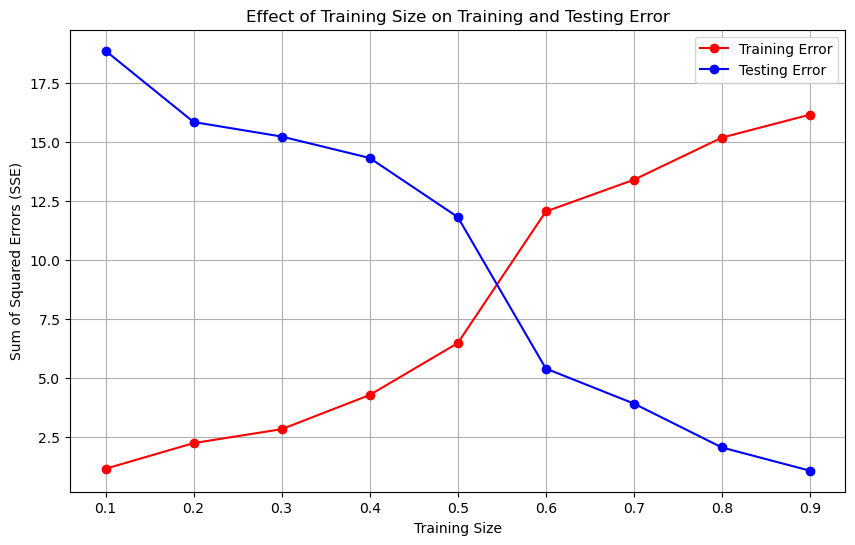

In [10]:
train_sizes = np.arange(0.1, 1.0, 0.1)
# Plot the SSE against the training size
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_sse, 'r-o', label="Training Error")
plt.plot(train_sizes, test_sse, 'b-o', label="Testing Error")
plt.grid(True)
plt.xlabel("Training Size")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Effect of Training Size on Training and Testing Error")
plt.legend()
plt.show()

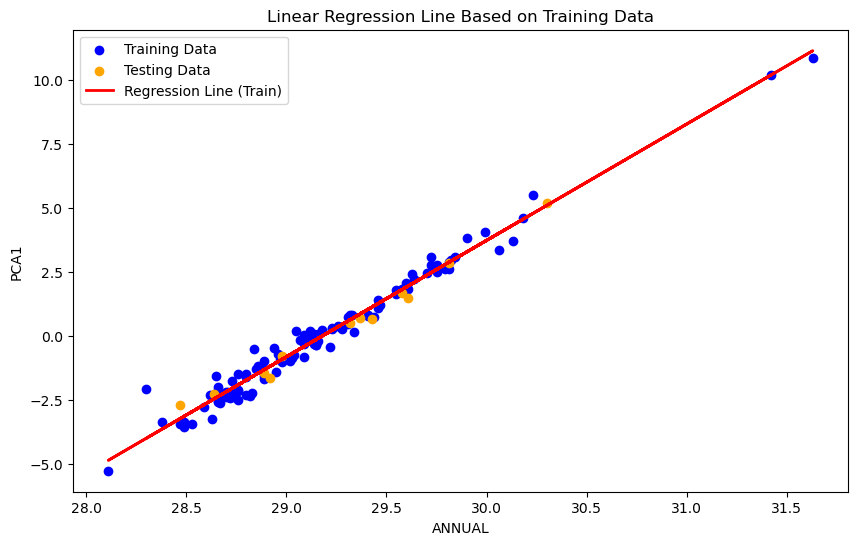

In [11]:
# Train the Linear Regression model on the training data only
model.fit(best_X_train, best_y_train)

# Predict the values using the training and test datasets separately
y_train_pred_full = model.predict(best_X_train)
y_test_pred_full = model.predict(best_X_test)

# Plot the actual vs predicted values based on the training and testing datasets
plt.figure(figsize=(10, 6))
plt.scatter(best_X_train, best_y_train, label="Training Data", color="blue")
plt.scatter(best_X_test, best_y_test, label="Testing Data", color="orange")
plt.plot(best_X_train, y_train_pred_full, label="Regression Line (Train)", color="red", linewidth=2)
plt.xlabel(input_feature_1)
plt.ylabel("PCA1")
plt.title("Linear Regression Line Based on Training Data")
plt.legend()
plt.show()

PRINTING MSE ,BEST TRAIN SIZE , BEST TEST SIZE, R-SQUARE , MAE

In [12]:
# Final minimum results after the loop
print(f"Best Model Train Size: {best_train_size}, Test Size: {best_test_size:.2f}")
print(f"MSE for testing: {min_mse_test:.2f}")
print(f"R2 for testing : {max_r2_test:.2f}")
print(f"MAE for testing: {min_mae_test:.2f}")
print(f"MSE for training: {min_mse_train:.2f}")
print(f"R2 for training: {max_r2_train:.2f}")
print(f"MAE for training: {min_mae_train:.2f}")
print(f"Best Training SSE: {best_train_sse}")
print(f"Best Testing SSE: {best_test_sse}")

Best Model Train Size: 0.9, Test Size: 0.10
MSE for testing: 0.09
R2 for testing : 0.98
MAE for testing: 0.23
MSE for training: 0.08
R2 for training: 0.99
MAE for training: 0.23
Best Training SSE: 16.17017937356401
Best Testing SSE: 1.0703142648212458


In [15]:
# Prepare the data for 3D modeling with two input features
X_double = data[[input_feature_1, input_feature_2]]

# Split the data for 3D model
X_train_3d, X_test_3d, y_train_3d, y_test_3d = train_test_split(X_double, y, train_size=0.8, random_state=42)

# Train the Linear Regression model using training data only
model = LinearRegression()
model.fit(X_train_3d, y_train_3d)

# Make predictions on testing and training data
y_train_pred_3d = model.predict(X_train_3d)
y_test_pred_3d = model.predict(X_test_3d)

# Calculate metrics for the test set
mse_test_3d = mean_squared_error(y_test_3d, y_test_pred_3d)
mae_test_3d = mean_absolute_error(y_test_3d, y_test_pred_3d)
r2_test_3d = r2_score(y_test_3d, y_test_pred_3d)

# Calculate metrics for the training set
mse_train_3d = mean_squared_error(y_train_3d, y_train_pred_3d)
mae_train_3d = mean_absolute_error(y_train_3d, y_train_pred_3d)
r2_train_3d = r2_score(y_train_3d, y_train_pred_3d)

# Calculate SSE for training and test sets
sse_train_3d = np.sum((y_train_3d - y_train_pred_3d) ** 2)
sse_test_3d = np.sum((y_test_3d - y_test_pred_3d) ** 2)

# Create a meshgrid for 3D plotting using the range of training data
x_surf, y_surf = np.meshgrid(np.linspace(X_train_3d[input_feature_1].min(), X_train_3d[input_feature_1].max(), 100),
                             np.linspace(X_train_3d[input_feature_2].min(), X_train_3d[input_feature_2].max(), 100))
z_surf = model.predict(np.array([x_surf.ravel(), y_surf.ravel()]).T)
z_surf = z_surf.reshape(x_surf.shape)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


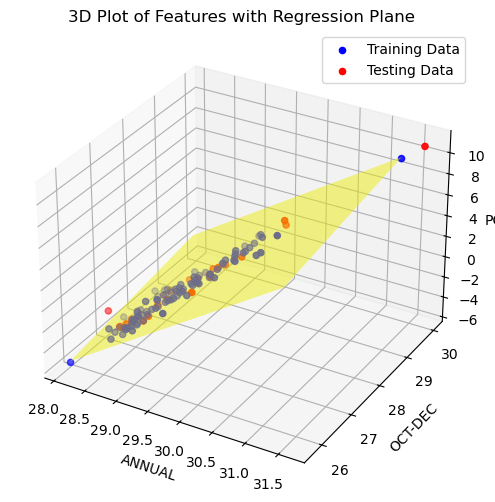

In [16]:
# 3D Plot of the Features with the regression plane
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot training data
ax.scatter(X_train_3d[input_feature_1], X_train_3d[input_feature_2], y_train_3d, color='blue', label='Training Data')
# Plot testing data
ax.scatter(X_test_3d[input_feature_1], X_test_3d[input_feature_2], y_test_3d, color='red', label='Testing Data')

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, z_surf, color='yellow', alpha=0.5)

ax.set_xlabel(input_feature_1)
ax.set_ylabel(input_feature_2)
ax.set_zlabel('PCA1')
ax.set_title('3D Plot of Features with Regression Plane')
ax.legend()

plt.show()

PRINTING MSE ,BEST TRAIN SIZE , BEST TEST SIZE, R-SQUARE , MAE FOR 3-D MODELLING

In [ ]:
# Print the results for the test set
print(f"MSE for testing : {mse_test_3d:.2f}")
print(f"MAE for testing : {mae_test_3d:.2f}")
print(f"R2 for testing: {r2_test_3d:.2f}")
print(f"MSE for training : {mse_train_3d:.2f}")
print(f"MAE for training : {mae_train_3d:.2f}")
print(f"R2 for training: {r2_train_3d:.2f}")
print(f"SSE for Training Set: {sse_train_3d:.2f}")
print(f"SSE for Testing Set: {sse_test_3d:.2f}")